# ODE System

Consider a system of two coupled ODE
$$
y' = Ay, \qquad A = \begin{bmatrix}
-100 & 1 \\
0 & -1/10 \end{bmatrix}
$$
with initial condition
$$
y(0) = y_0
$$

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt

The $\theta$ scheme is given by
$$
y^{n+1} = y^n + h [(1-\theta) Ay^n + \theta Ay^{n+1}]
$$
i.e.
$$
[I-\theta hA] y^{n+1} = y^n + (1-\theta)h A y^n
$$
The following function implements the $\theta$ scheme.

In [7]:
def solve(y0,h,T,theta):
    A = np.matrix([[-100.0, 1.0], [0.0, -0.1]])
    A1 = np.eye(2) - h*theta*A
    A1 = np.linalg.inv(A1)
    A2 = np.eye(2) + (1.0-theta)*h*A
    M  = A1.dot(A2)
    N = int(T/h)
    y = np.ndarray((N,2))
    t = np.zeros(N)
    y[0,:]=y0
    t[0] = 0.0
    for i in range(N-1):
        y[i+1,:] = M.dot(y[i,:])
        t[i+1] = t[i] + h
    plt.figure(figsize=(9,4))
    plt.subplot(1,2,1)
    plt.plot(t,y[:,0])
    plt.xlabel('t')
    plt.title('First component')
    plt.subplot(1,2,2)
    plt.plot(t,y[:,1])
    plt.xlabel('t')
    plt.title('Second component')
    
# Initial condition
y0 = np.array([10.0/999.0,1.0])

# Final time
T = 25.0

## Forward Euler, $\theta=0$

The stability condition is
$$
|1-100h| < 1, \qquad |1-h/10| < 1
$$
which means that we need to choose $h < 1/50$. We first try with $h=0.01$

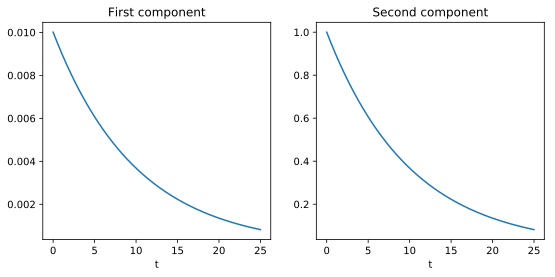

In [8]:
h = 0.01
solve(y0,h,T,0.0)

We now try with $h=0.021$ which is slightly larger than the stability limit.

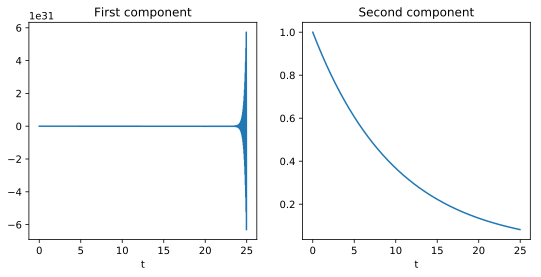

In [9]:
h = 0.021
solve(y0,h,T,0.0)

## Trapezoidal scheme, $\theta = 0.5$

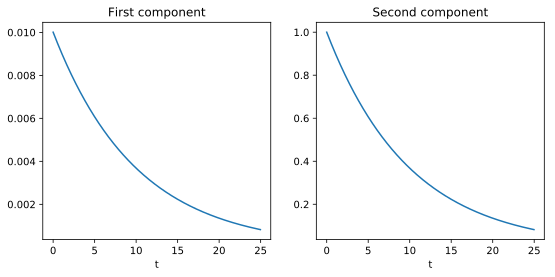

In [10]:
h = 0.021
solve(y0,h,T,0.5)